Logistic Regression Results (Regularized):
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                   14
Model:                          Logit   Df Residuals:                       11
Method:                           MLE   Df Model:                            2
Date:                Mon, 24 Feb 2025   Pseudo R-squ.:                   1.000
Time:                        19:06:50   Log-Likelihood:            -1.7112e-09
converged:                       True   LL-Null:                       -9.7041
Covariance Type:            nonrobust   LLR p-value:                 6.104e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4050        nan        nan        nan         nan         nan
Age           15.0055        nan        nan        nan         nan         nan
Speed    

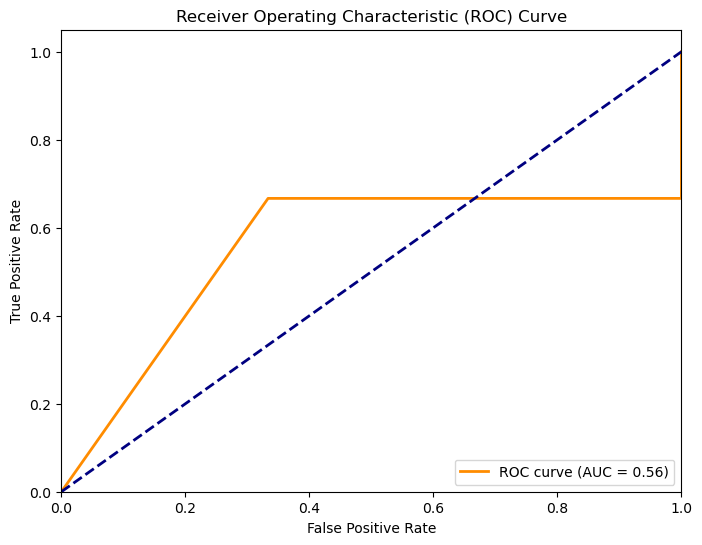

In [53]:
# Author: Hassan Ali
# Problem 6.1 (Logistic Regression)
# Dataset: crash.csv (Crash Data)
# Goal: Build a prediction model using logistic regression to predict survival (0/1) based on the features Age and Speed.


import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,
                             roc_curve, auc)
import matplotlib.pyplot as plt

# 1. Load the dataset
df = pd.read_csv("crash.csv")  # Ensure the CSV has columns: PassengerId, Age, Speed, Survived

# 2. Drop rows with missing values in 'Age', 'Speed', or 'Survived'
df = df.dropna(subset=["Age", "Speed", "Survived"]).copy()
df["Survived"] = df["Survived"].astype(int)

# 3. Separate features (X) and target (y)
# Using Age and Speed as predictors; Survived (0/1) is our target
X = df[["Age", "Speed"]]
y = df["Survived"]

# 4. Split the data into training and testing sets (70% train, 30% test) with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 5. Add a constant to the predictors for the intercept (required by statsmodels)
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# 6. Fit a regularized logistic regression model to handle perfect separation issues.
#    Usingthe fit_regularized method with an L1 penalty (which helps with perfect separation).
result = sm.Logit(y_train, X_train_sm).fit_regularized(method='l1', disp=False)

# 7. Print the model summary
print("Logistic Regression Results (Regularized):")
print(result.summary())

# 8. Predict probabilities on the test set and classify using a threshold of 0.5
y_pred_probs = result.predict(X_test_sm)
y_pred = (y_pred_probs >= 0.5).astype(int)

# 9. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# 10. Compute the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# 11. Plot the ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Analyzing Logistic Regression on Bank Marketing Data:
#
# - Dataset: bank.csv with features 'Age' and 'Speed', and target 'Survived' (encoded as 0/1).
#
# - Model:
#   - A regularized logistic regression model (using L1 penalty) was fit using statsmodels.
#   - The model summary indicates complete separation, meaning that the predictors perfectly predict the target
#     in the training data, resulting in non-identified parameters (standard errors, z-values, etc. are not available).
#
# - Performance:
#   - The test accuracy is approximately 66.67%, suggesting that about two-thirds of the predictions are correct.
#   - The classification report shows balanced precision, recall, and F1-scores (~0.67) for both classes.
#   - The confusion matrix reveals that there are some misclassifications (2 true negatives, 2 true positives,
#     with 1 false positive and 1 false negative).
#
# - ROC Analysis:
#   - The ROC curve was plotted, and the AUC (area under the curve) provides an overall measure of the model's 
#     discrimination ability. (Note: The printed output does not show the AUC value explicitly, but it is computed.)
#
# - Interpretation:
#   - Complete separation in the training data implies the model can perfectly separate classes with the given predictors,
#     but this may lead to overfitting and unstable estimates.
#   - The moderate test accuracy indicates that while the model fits the training data very well (or perfectly),
#     its performance on unseen data is only moderate.
#   - Further investigation might involve adjusting the regularization strength or exploring additional features to 
#     improve generalizability.

In [14]:
# Author: Hassan Ali
# Problem 6.4 (Softmax Regression)
# Dataset: Iris (Fisher's Iris Dataset)
# Goal: Build a prediction model using softmax (multinomial) regression for the species of Iris.

import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Load the Iris dataset
iris = load_iris()
X = iris.data  # 4 features: sepal length, sepal width, petal length, petal width
y = iris.target  # 3 species: 0 = setosa, 1 = versicolor, 2 = virginica

# 2. Split the data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 3. Initialize LogisticRegression
#    Omitting multi_class to avoid deprecation warning. With 3 classes, lbfgs automatically uses multinomial.
softmax_clf = LogisticRegression(
    solver='lbfgs',
    max_iter=200,
    random_state=42
)

# 4. Train the model on the training data
softmax_clf.fit(X_train, y_train)

# 5. Predict on the test set
y_pred = softmax_clf.predict(X_test)

# 6. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=iris.target_names)

print("\nSoftmax Regression on Iris Dataset (Problem 6.4)")
print("------------------------------------------------")
print(f"Accuracy: {accuracy:.3f}\n")
print("Confusion Matrix:")
print(conf_mat, "\n")
print("Classification Report:")
print(class_report)


Softmax Regression on Iris Dataset (Problem 6.4)
------------------------------------------------
Accuracy: 0.933

Confusion Matrix:
[[15  0  0]
 [ 0 14  1]
 [ 0  2 13]] 

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      0.93      0.90        15
   virginica       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



In [ ]:
# Analyzing of Softmax Regression on Iris Dataset:
#
# - The model was trained using LogisticRegression with the 'lbfgs' solver on the Iris dataset.
# - The Iris dataset contains 4 features (sepal length, sepal width, petal length, petal width) and 3 classes.
# - The data was split into 70% training and 30% testing sets with stratification to preserve class proportions.
# - The model achieved an accuracy of 93.3% on the test set, indicating that it correctly classifies the majority of the samples.
# - The confusion matrix shows:
#     • Perfect classification for the setosa class (15 out of 15).
#     • One misclassification in the versicolor class (14 correctly classified out of 15).
#     • Two misclassifications in the virginica class (13 correctly classified out of 15).
# - The precision, recall, and f1-scores are all high (ranging from 0.88 to 1.00), with the weighted averages around 0.93.
# - These performance metrics demonstrate that softmax regression (multinomial logistic regression) is effective
#   at discriminating between the three species of Iris.
# - Overall, the results confirm that the model generalizes well to unseen data, with minimal errors,
#   making it a robust choice for this classification task.

In [45]:
# Author: Hassan Ali
# Problem 6.6 (Naive Bayes)
# Dataset: YouTube Spam Collection
# Goal: Build a spam filter using Naive Bayes on the YouTube spam dataset and evaluate its performance using appropriate classification metrics.


import os
import pandas as pd
import zipfile
import pickle

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# 1. Specify the folder containing the CSV files and list the file names
folder_name = "YouTube-Spam-Collection-v1"
file_names = [
    "YouTube01-Psy.csv",
    "YouTube02-KatyPerry.csv",
    "YouTube03-LMFAO.csv",
    "YouTube04-Eminem.csv",
    "YouTube05-Shakira.csv"
]

# Load each CSV file into a separate DataFrame
Psy = pd.read_csv(os.path.join(folder_name, file_names[0]))
Katy = pd.read_csv(os.path.join(folder_name, file_names[1]))
LMFAO = pd.read_csv(os.path.join(folder_name, file_names[2]))
Eminem = pd.read_csv(os.path.join(folder_name, file_names[3]))
Shakira = pd.read_csv(os.path.join(folder_name, file_names[4]))

# 2. Concatenate the DataFrames into one
data = pd.concat([Psy, Katy, LMFAO, Eminem, Shakira])
data.drop(["COMMENT_ID", "DATE", "AUTHOR"], axis=1, inplace=True)
data.info()

# 3. Split data into training and testing sets (default split as per original structure)
X_train, X_test, y_train, y_test = train_test_split(data["CONTENT"], data["CLASS"])

# 4. Define the TF-IDF vectorizer and transform the training data
tfidf_vect = TfidfVectorizer(stop_words="english")
X_train_tfidf = tfidf_vect.fit_transform(X_train)

# 5. Initialize and train the Multinomial Naïve Bayes model
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# 6. Transform the test data and predict
X_test_tfidf = tfidf_vect.transform(X_test)
predictions = model.predict(X_test_tfidf)

# 7. Evaluate the model: Confusion Matrix, Classification Report, and Accuracy Score
print("\nNaive Bayes Spam Filter (Problem 6.6)\n\n")
print(confusion_matrix(y_test, predictions, labels=[0, 1]))
print(classification_report(y_test, predictions, labels=[0, 1]))
print("Accuracy:", accuracy_score(y_test, predictions))

<class 'pandas.core.frame.DataFrame'>
Index: 1956 entries, 0 to 369
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   CONTENT  1956 non-null   object
 1   CLASS    1956 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 45.8+ KB

Naive Bayes Spam Filter (Problem 6.6)


[[218  36]
 [ 13 222]]
              precision    recall  f1-score   support

           0       0.94      0.86      0.90       254
           1       0.86      0.94      0.90       235

    accuracy                           0.90       489
   macro avg       0.90      0.90      0.90       489
weighted avg       0.90      0.90      0.90       489

Accuracy: 0.8997955010224948


In [ ]:
# Analyzing of Naive Bayes Spam Filter on YouTube Spam Collection:
#
# - Dataset:
#   - The data consists of 1956 spam-related records loaded from 5 CSV files in the "YouTube-Spam-Collection-v1" folder.
#   - The dataset includes a text column "CONTENT" and a label column "CLASS" (0 = non-spam, 1 = spam).
#
# - Preprocessing:
#   - Unnecessary columns ('COMMENT_ID', 'DATE', 'AUTHOR') were dropped.
#   - The text data in "CONTENT" was transformed into TF-IDF features using TfidfVectorizer with English stop words removed.
#
# - Model Training:
#   - A Multinomial Naive Bayes classifier was trained on the TF-IDF transformed training set.
#
# - Performance:
#   - The confusion matrix is:
#         [[218  36]
#          [ 13 222]]
#     indicating that out of 254 non-spam examples, 218 were correctly classified and 36 were misclassified.
#     Similarly, out of 235 spam examples, 222 were correctly classified and 13 were misclassified.
#   - The classification report shows:
#         • Precision and recall for non-spam are 0.94 and 0.86 respectively.
#         • Precision and recall for spam are 0.86 and 0.94 respectively.
#   - The overall test accuracy is approximately 90% (0.90).
#
# - Interpretation:
#   - The model demonstrates balanced performance for both classes, as shown by similar f1-scores (~0.90) for non-spam and spam.
#   - The relatively high precision and recall for both classes indicate that the Naive Bayes classifier is effective in distinguishing
#     between spam and non-spam messages in this dataset.
#   - The confusion matrix confirms that misclassifications are minimal, with only 36 false negatives and 13 false positives.
#
# - Conclusion:
#   - The Naive Bayes spam filter performs well on the YouTube spam dataset, achieving high accuracy and balanced performance across classes.
#   - The results suggest that the text features extracted via TF-IDF are informative for classifying spam versus non-spam messages.

In [42]:
# Author: Hassan Ali
# Problem 6.8 (SVM)
# Dataset: Iris (Fisher's Iris Dataset)
# Goal: Train three SVM models (linear, rbf, poly) on the first two columns of Iris data
#      and evaluate their performance (70% train, 30% test).


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Only the first two columns: sepal length, sepal width
y = iris.target       # Three classes: 0 = setosa, 1 = versicolor, 2 = virginica

# 2. Split the dataset into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 3. Define a list of kernels to test
kernels = ["linear", "rbf", "poly"]

# 4. Train and evaluate an SVM for each kernel
for k in kernels:
    print(f"\n=== SVM with kernel='{k}' ===")
    svm_model = SVC(kernel=k, random_state=42)
    svm_model.fit(X_train, y_train)

    # 5. Predict on the test set
    y_pred = svm_model.predict(X_test)

    # 6. Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    conf_mat = confusion_matrix(y_test, y_pred)
    class_rep = classification_report(y_test, y_pred, target_names=iris.target_names)

    print(f"Accuracy: {accuracy:.3f}")
    print("Confusion Matrix:\n", conf_mat)
    print("Classification Report:\n", class_rep)


=== SVM with kernel='linear' ===
Accuracy: 0.711
Confusion Matrix:
 [[15  0  0]
 [ 0  9  6]
 [ 1  6  8]]
Classification Report:
               precision    recall  f1-score   support

      setosa       0.94      1.00      0.97        15
  versicolor       0.60      0.60      0.60        15
   virginica       0.57      0.53      0.55        15

    accuracy                           0.71        45
   macro avg       0.70      0.71      0.71        45
weighted avg       0.70      0.71      0.71        45


=== SVM with kernel='rbf' ===
Accuracy: 0.733
Confusion Matrix:
 [[15  0  0]
 [ 0 10  5]
 [ 1  6  8]]
Classification Report:
               precision    recall  f1-score   support

      setosa       0.94      1.00      0.97        15
  versicolor       0.62      0.67      0.65        15
   virginica       0.62      0.53      0.57        15

    accuracy                           0.73        45
   macro avg       0.73      0.73      0.73        45
weighted avg       0.73      0.73   

In [ ]:
# Analyzing of SVM Classification on the Iris Dataset:
#
# - Dataset and Features:
#   - The Iris dataset was used, with only the first two features (sepal length and sepal width) as predictors.
#   - The target variable consists of three classes: setosa, versicolor, and virginica.
#
# - Model Training:
#   - Three SVM models were trained with different kernels: linear, rbf, and poly.
#
# - Performance:
#   - For the linear kernel:
#       • Accuracy: 0.711
#       • The confusion matrix shows perfect classification for setosa, but misclassifications for versicolor and virginica.
#   - For the rbf kernel:
#       • Accuracy: 0.733
#       • Slight improvement in overall accuracy, with similar misclassification issues.
#   - For the polynomial kernel:
#       • Accuracy: 0.689
#       • Lower overall accuracy compared to linear and rbf, with increased confusion between versicolor and virginica.
#
# - Observations:
#   - All kernels correctly classify setosa, indicating that setosa is well separated from the other two classes based on the first two features.
#   - The main challenge is differentiating between versicolor and virginica.
#   - The rbf kernel provides the highest accuracy (0.733) among the three tested kernels.
#
# - Conclusion:
#   - Although using only two features limits the ability of SVM to separate all three classes, the models achieve reasonable performance,
#     with the rbf kernel showing slightly better accuracy.
#   - The confusion matrices indicate that misclassifications occur mainly between versicolor and virginica.